In [1]:
import matplotlib.pyplot as plt
import re
import math

In [2]:
def get_data(file):
    sizes = []
    cache_to_bus_wb = []
    cache_to_bus_wt = []
    with open(file, 'r') as f:
        for line in f:
            if "capacity" in line:
                beg = re.search(r"\d", line).start()
                end = line.index("B")
                sizes.append(math.log(int(line[beg:end]), 2))
            if "B_written_cache_to_bus_wb" in line:
                beg = re.search(r"\d", line).start()
                cache_to_bus_wb.append(int(line[beg:]))
            if "B_written_cache_to_bus_wt" in line:
                beg = re.search(r"\d", line).start()
                cache_to_bus_wt.append(int(line[beg:]))
    return sizes, cache_to_bus_wb, cache_to_bus_wt

In [3]:
def plot_wb_wt(x, y, z):
    plt.plot(x, y, color='r', label='Writeback data')
    plt.plot(x, z, color='g', label='Writethrough data')
    plt.xlabel("Cache Capacity (2^x Bytes)")
    plt.ylabel("Bytes")
    plt.title("Cache Size vs. Writeback/Writethrough Data")
    plt.legend()
    plt.show()

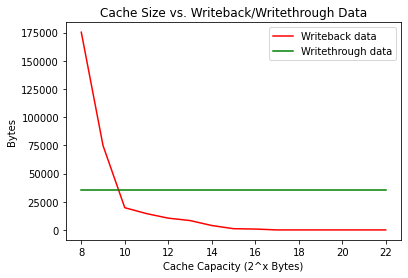

In [4]:
if __name__ == "__main__":
    sizes, cache_to_bus_wb, cache_to_bus_wt = get_data("log.txt")
    plot_wb_wt(sizes, cache_to_bus_wb, cache_to_bus_wt)